# Importing Libraries

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import os
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
from sklearn.metrics import mean_absolute_error,mean_squared_error
import statsmodels.api as sm
from pandas.tseries.offsets import DateOffset

## Reading the dataset

In [2]:
os.chdir('C:\\Users\\Akash Deepak\\Desktop\\Project')
data_main = pd.read_csv("TS Data.csv",index_col=[0],parse_dates=[0])
data_main.head()

,Usage
Date,
2020-02-29,4006.44
2020-02-29,3986.38
2020-02-29,3900.36
2020-02-29,3855.48
2020-02-29,3828.82


## Convering daily data to monthly data

In [3]:
data=data_main.resample('1M').mean()
data.head()

,Usage
Date,
2015-04-30,4109.700347
2015-05-31,5457.000336
2015-06-30,5335.030528
2015-07-31,6506.275874
2015-08-31,6637.765457


In [4]:
data_total=data_main.resample('1M').sum()
data_total.head()

,Usage
Date,
2015-04-30,11835937.00
2015-05-31,16240033.00
2015-06-30,15364887.92
2015-07-31,19362677.00
2015-08-31,19753990.00


## EDA

In [5]:
len(data)

59

In [6]:
data.tail()

,Usage
Date,
2019-10-31,5823.308337
2019-11-30,4681.027293
2019-12-31,5027.996996
2020-01-31,5234.459817
2020-02-29,5322.306154


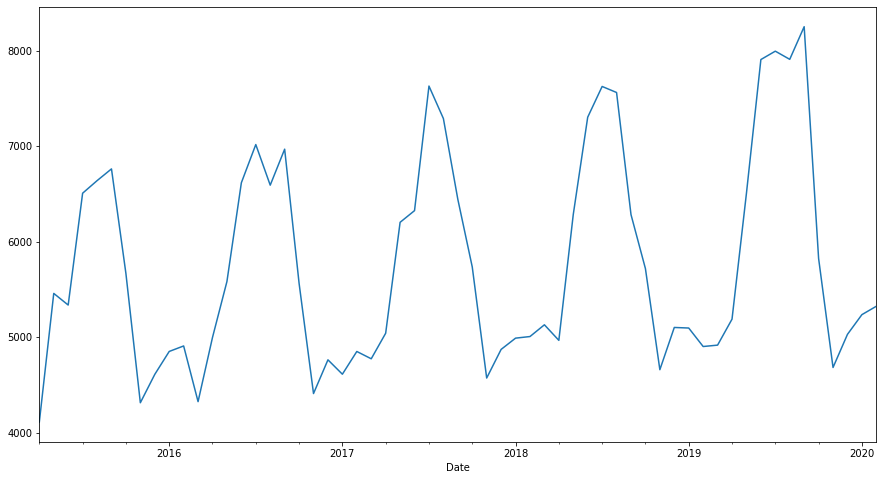

In [7]:
plt.rcParams['figure.figsize'] = [15, 8]
data["Usage"].plot()

In [8]:
data.describe()

,Usage
count,59.000000
mean,5757.113538
std,1112.939970
min,4109.700347
25%,4903.564116
50%,5335.030528
75%,6548.450020
max,8250.526937


# Seasonal Decompose

## Additive Decompose

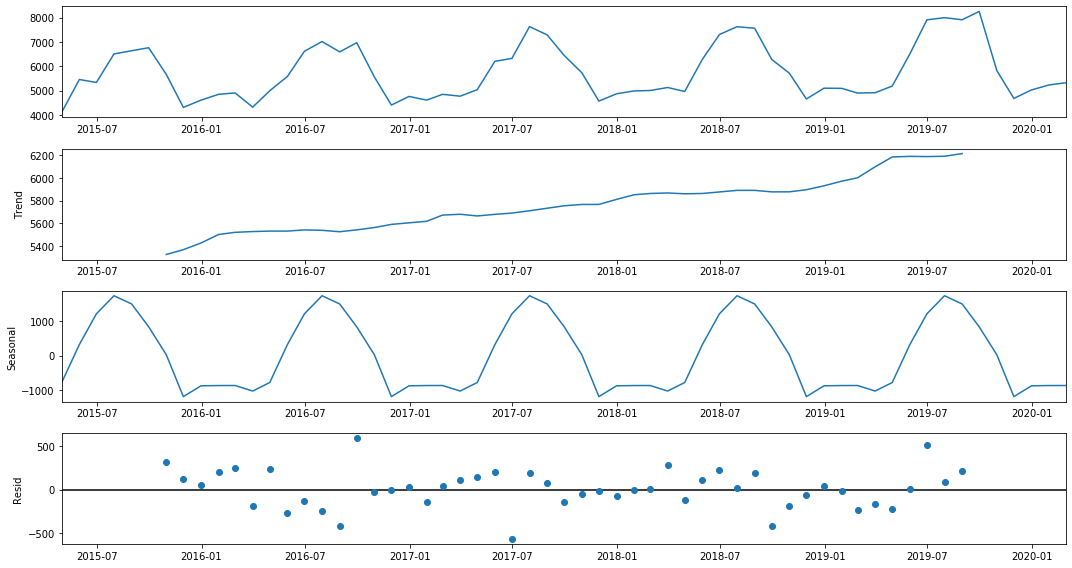

In [9]:
result_a= seasonal_decompose(data,model='additive',period=12)
result_a.plot()
plt.show()

## Multiplicative Decomposition

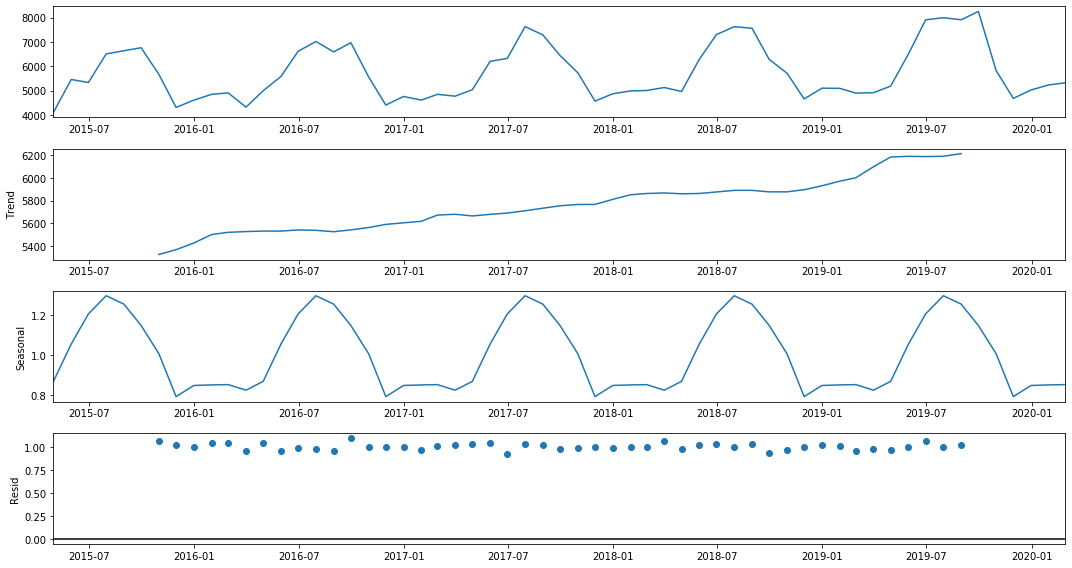

In [10]:
result_m= seasonal_decompose(data,model='multiplicative',period=12)
result_m.plot()
plt.show()

# MODEL SELECTION - HOLT WINTER MODEL

## Holt-Winter Model - Double Exponential Smoothening - Mean Data

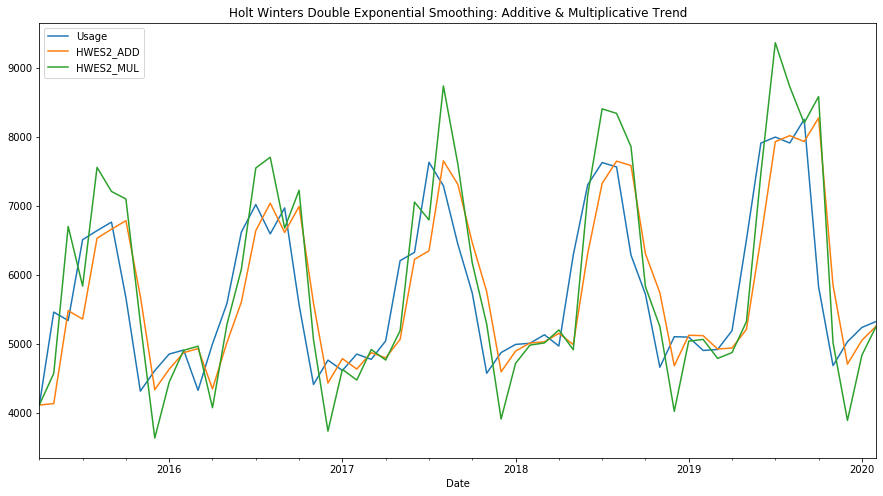

In [11]:
data['HWES2_ADD'] = ExponentialSmoothing(data['Usage'],trend='add').fit().fittedvalues
data['HWES2_MUL'] = ExponentialSmoothing(data['Usage'],trend='mul').fit().fittedvalues
data[['Usage','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive & Multiplicative Trend')

## Holt-Winter Model - Double Exponential Smoothening - Sum Data

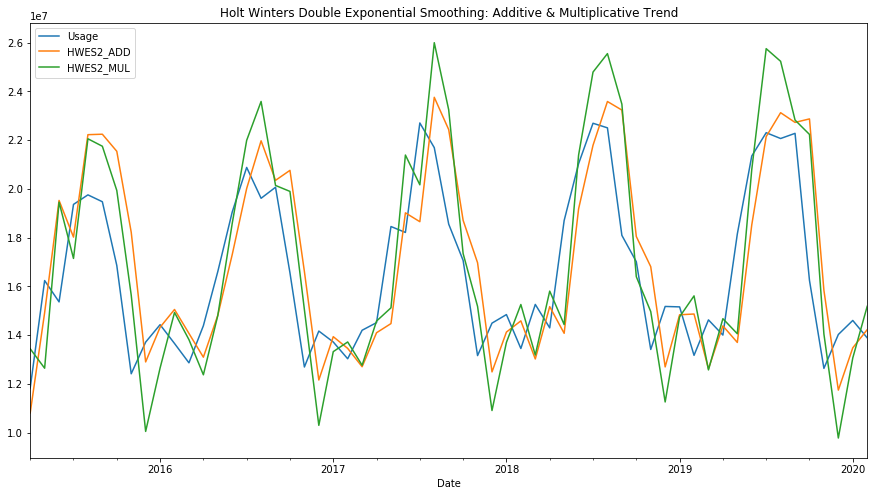

In [12]:
data_total['HWES2_ADD'] = ExponentialSmoothing(data_total['Usage'],trend='add').fit().fittedvalues
data_total['HWES2_MUL'] = ExponentialSmoothing(data_total['Usage'],trend='mul').fit().fittedvalues
data_total[['Usage','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive & Multiplicative Trend')

## Holt-Winter Model - Tripple Exponential Smoothening - Mean Data

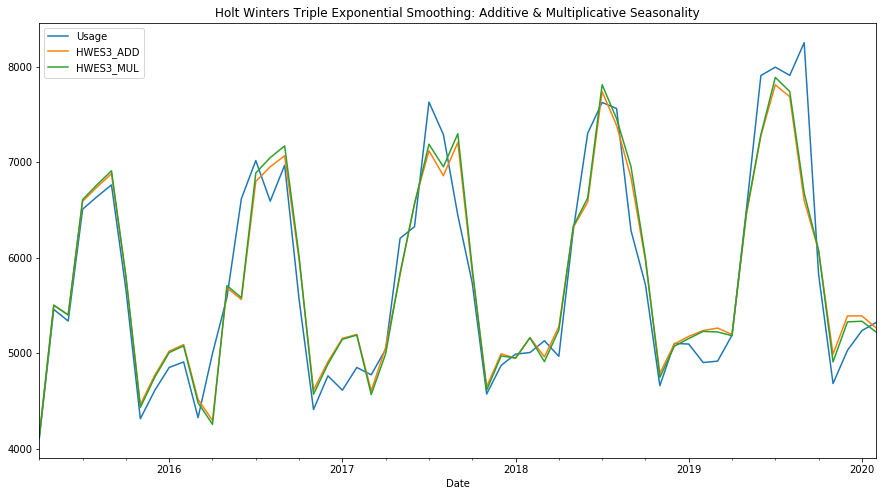

In [13]:
data['HWES3_ADD'] = ExponentialSmoothing(data['Usage'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
data['HWES3_MUL'] = ExponentialSmoothing(data['Usage'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
data[['Usage','HWES3_ADD','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive & Multiplicative Seasonality')

## Holt-Winter Model - Tripple Exponential Smoothening - Sum Data

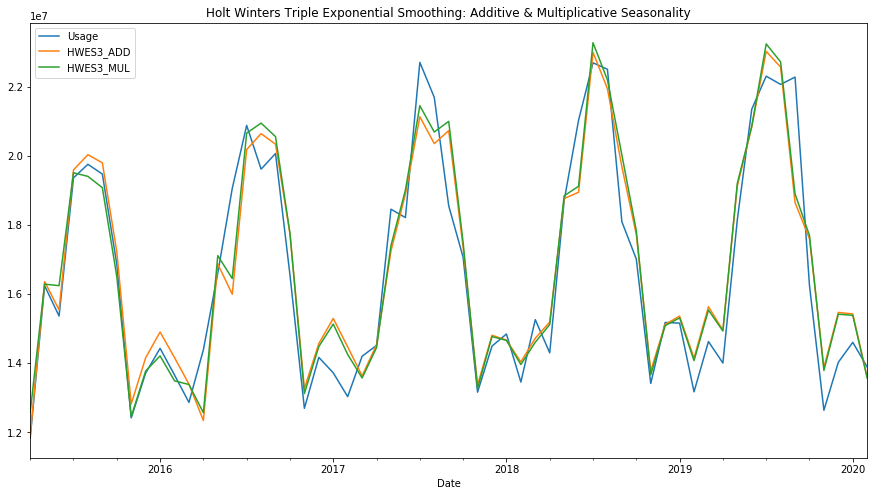

In [14]:
data_total['HWES3_ADD'] = ExponentialSmoothing(data_total['Usage'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
data_total['HWES3_MUL'] = ExponentialSmoothing(data_total['Usage'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
data_total[['Usage','HWES3_ADD','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive & Multiplicative Seasonality')

## Actual vs Predicted Values - Mean Data

In [15]:
data.head()

,Usage,HWES2_ADD,HWES2_MUL,HWES3_ADD,HWES3_MUL
Date,,,,,
2015-04-30,4109.700347,4109.688091,4109.564702,4132.333351,4126.885077
2015-05-31,5457.000336,4130.619059,4568.453166,5501.012438,5501.463240
2015-06-30,5335.030528,5477.919048,6698.836846,5399.174595,5398.509307
2015-07-31,6506.275874,5355.949240,5834.118127,6589.314644,6606.689596
2015-08-31,6637.765457,6527.194586,7554.507150,6738.474448,6762.244022


## Actual vs Predicted Values - Sum Data

In [16]:
data_total.head()

,Usage,HWES2_ADD,HWES2_MUL,HWES3_ADD,HWES3_MUL
Date,,,,,
2015-04-30,11835937.00,1.081172e+07,1.344241e+07,1.189849e+07,1.258196e+07
2015-05-31,16240033.00,1.492260e+07,1.264561e+07,1.636168e+07,1.628739e+07
2015-06-30,15364887.92,1.952563e+07,1.945399e+07,1.554217e+07,1.624349e+07
2015-07-31,19362677.00,1.802221e+07,1.714691e+07,1.959218e+07,1.950993e+07
2015-08-31,19753990.00,2.222241e+07,2.205371e+07,2.003233e+07,1.940431e+07


# Predictions of Mean Values of actual data

# Train Test Split

In [17]:
train_data = data[:45]
test_data = data[45:]
del train_data['HWES3_ADD']
del test_data['HWES3_ADD']
del train_data['HWES3_MUL']
del test_data['HWES3_MUL']

In [18]:
train_data.head()

,Usage,HWES2_ADD,HWES2_MUL
Date,,,
2015-04-30,4109.700347,4109.688091,4109.564702
2015-05-31,5457.000336,4130.619059,4568.453166
2015-06-30,5335.030528,5477.919048,6698.836846
2015-07-31,6506.275874,5355.949240,5834.118127
2015-08-31,6637.765457,6527.194586,7554.507150


## Forecasting using Triple HWES-Multiplicative

In [19]:
fitted_model_mul=ExponentialSmoothing(train_data['Usage'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_predictions_mul = fitted_model_mul.forecast(14)
print(test_predictions_mul,test_data)

2019-01-31    5148.206072
2019-02-28    5206.350252
2019-03-31    5270.887468
2019-04-30    5197.912307
2019-05-31    6532.806959
2019-06-30    7426.429268
2019-07-31    7916.194595
2019-08-31    7791.555330
2019-09-30    6606.172444
2019-10-31    5978.783433
2019-11-30    4854.809045
2019-12-31    5260.167490
2020-01-31    5348.513579
2020-02-29    5408.920044
Freq: M, dtype: float64                   Usage    HWES2_ADD    HWES2_MUL
Date                                             
2019-01-31  5094.299026  5121.176851  5035.178708
2019-02-28  4900.619252  5115.217738  5060.961758
2019-03-31  4915.211384  4921.537964  4785.835041
2019-04-30  5187.118848  4936.130097  4869.669807
2019-05-31  6505.515176  5208.037560  5318.706555
2019-06-30  7906.321022  6526.433888  7468.730437
2019-07-31  7994.068907  7927.239734  9362.126415
2019-08-31  7908.530806  8014.987619  8724.271022
2019-09-30  8250.526937  7929.449519  8198.161047
2019-10-31  5823.308337  8271.445649  8581.977389
2019-11-30  

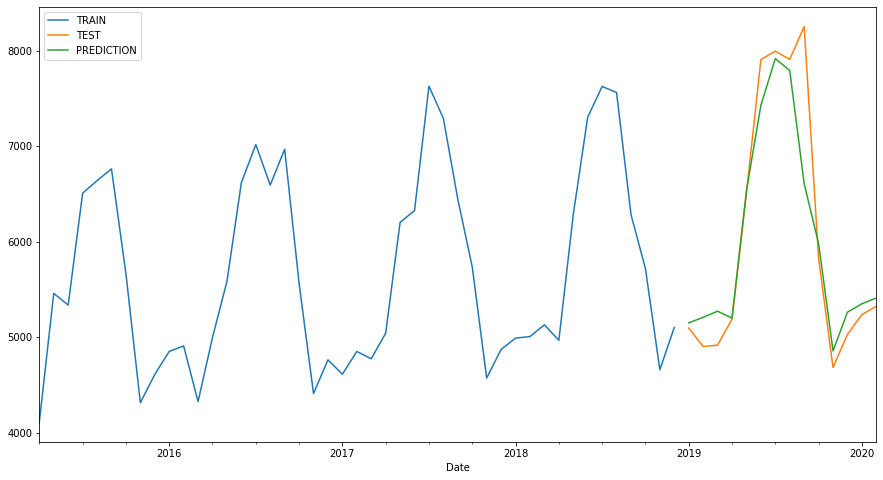

In [20]:
train_data['Usage'].plot(legend=True,label='TRAIN')
test_data['Usage'].plot(legend=True,label='TEST')
test_predictions_mul.plot(legend=True,label='PREDICTION')

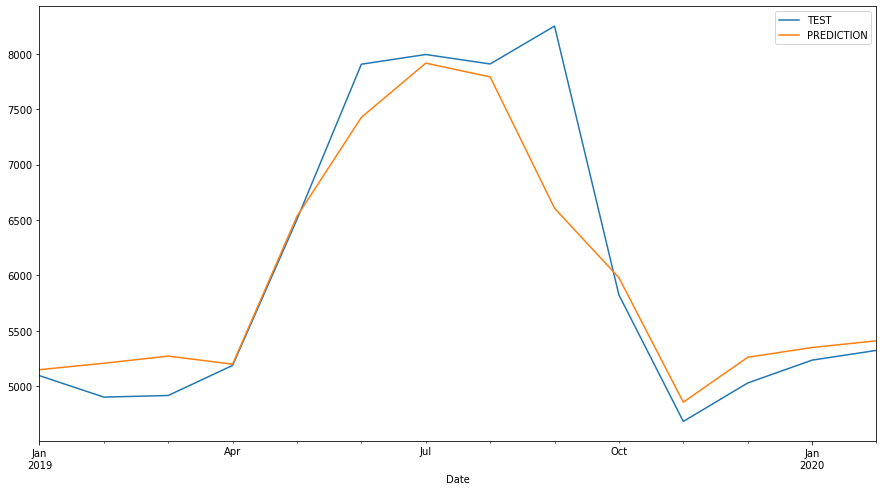

In [21]:
test_data['Usage'].plot(legend=True,label='TEST')
test_predictions_mul.plot(legend=True,label='PREDICTION',xlim=['2019-01-31','2020-02-29 '])

# Evaluation Metrics

In [25]:
import numpy as np
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [28]:
mean_absolute_percentage_error(data['Usage'].loc['2019-01-31':'2020-02-29'], fitted_model_mul.predict(start='2019-01-31',end='2020-02-29'))

4.172863436296749

# Forecasting using Triple HWES-Additive

In [29]:
fitted_model_add=ExponentialSmoothing(train_data['Usage'],trend='add',seasonal='add',seasonal_periods=12).fit()
test_predictions_add = fitted_model_add.forecast(14)
print(test_predictions_add,test_data)

2019-01-31    5172.073392
2019-02-28    5228.174296
2019-03-31    5294.946637
2019-04-30    5223.105721
2019-05-31    6502.284934
2019-06-30    7359.852076
2019-07-31    7824.361789
2019-08-31    7703.366548
2019-09-30    6555.063956
2019-10-31    5958.170155
2019-11-30    4886.944692
2019-12-31    5297.274579
2020-01-31    5380.783535
2020-02-29    5436.884440
Freq: M, dtype: float64                   Usage    HWES2_ADD    HWES2_MUL
Date                                             
2019-01-31  5094.299026  5121.176851  5035.178708
2019-02-28  4900.619252  5115.217738  5060.961758
2019-03-31  4915.211384  4921.537964  4785.835041
2019-04-30  5187.118848  4936.130097  4869.669807
2019-05-31  6505.515176  5208.037560  5318.706555
2019-06-30  7906.321022  6526.433888  7468.730437
2019-07-31  7994.068907  7927.239734  9362.126415
2019-08-31  7908.530806  8014.987619  8724.271022
2019-09-30  8250.526937  7929.449519  8198.161047
2019-10-31  5823.308337  8271.445649  8581.977389
2019-11-30  

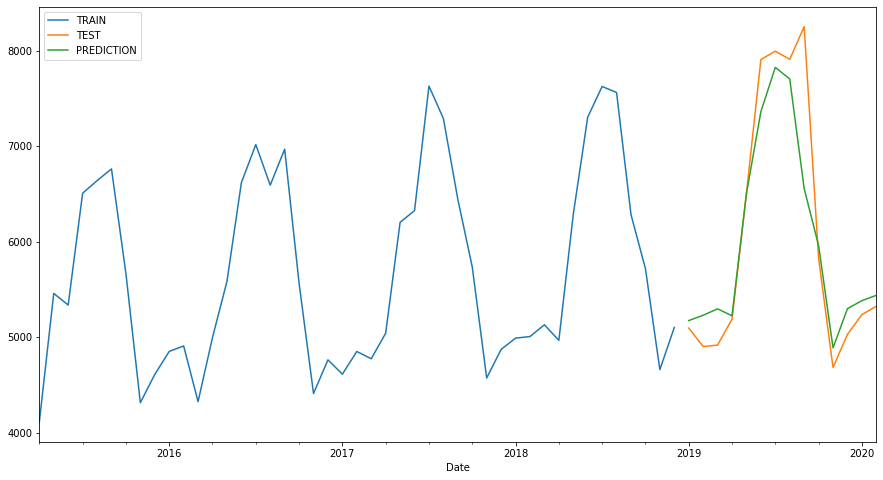

In [30]:
train_data['Usage'].plot(legend=True,label='TRAIN')
test_data['Usage'].plot(legend=True,label='TEST')
test_predictions_add.plot(legend=True,label='PREDICTION')

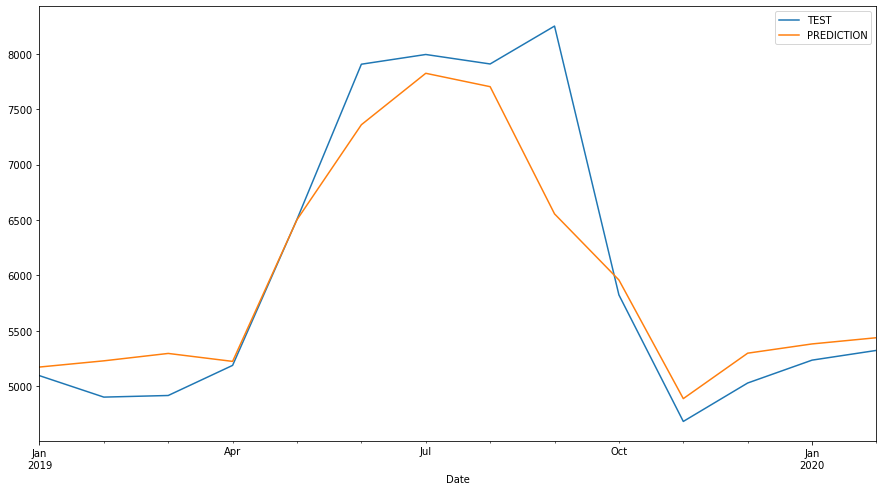

In [31]:
test_data['Usage'].plot(legend=True,label='TEST')
test_predictions_add.plot(legend=True,label='PREDICTION',xlim=['2019-01-31','2020-02-29 '])

## Evaluation Metrics

In [32]:
mean_absolute_percentage_error(data['Usage'].loc['2019-01-31':'2020-02-29'], fitted_model_add.predict(start='2019-01-31',end='2020-02-29'))

4.705506812611829

# Predictions of Total values of actual data

## Train-Test Split

In [33]:
train_data_sum = data_total[:45]
test_data_sum = data_total[45:]
del train_data_sum['HWES3_ADD']
del test_data_sum['HWES3_ADD']
del train_data_sum['HWES2_MUL']
del test_data_sum['HWES2_MUL']
del train_data_sum['HWES2_ADD']
del train_data_sum['HWES3_MUL']
del test_data_sum['HWES2_ADD']
del test_data_sum['HWES3_MUL']

In [34]:
test_data_sum.head()

,Usage
Date,
2019-01-31,15160633.90
2019-02-28,13172864.55
2019-03-31,14627669.08
2019-04-30,14005220.89
2019-05-31,18150387.34


## Forecasting using Triple HWES-Multiplicative

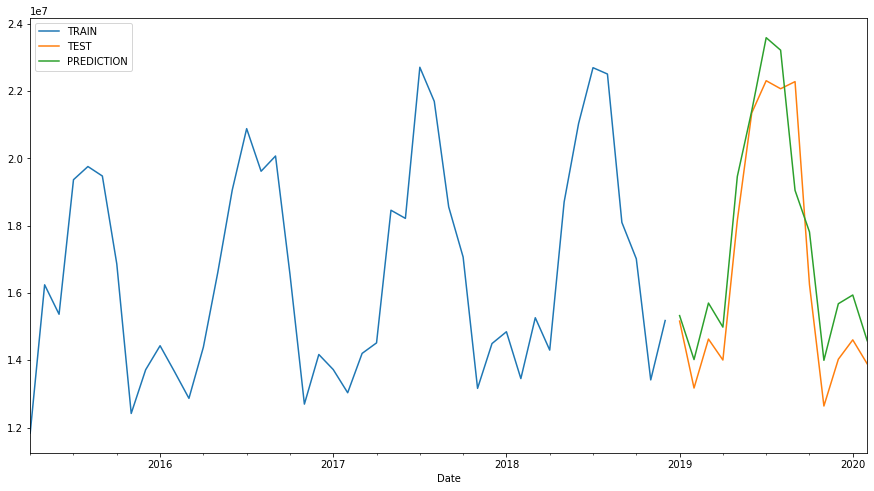

In [35]:
fitted_model_sum_mul=ExponentialSmoothing(train_data_sum['Usage'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_predictions_sum_mul = fitted_model_sum_mul.forecast(14)
train_data_sum['Usage'].plot(legend=True,label='TRAIN')
test_data_sum['Usage'].plot(legend=True,label='TEST')
test_predictions_sum_mul.plot(legend=True,label='PREDICTION')

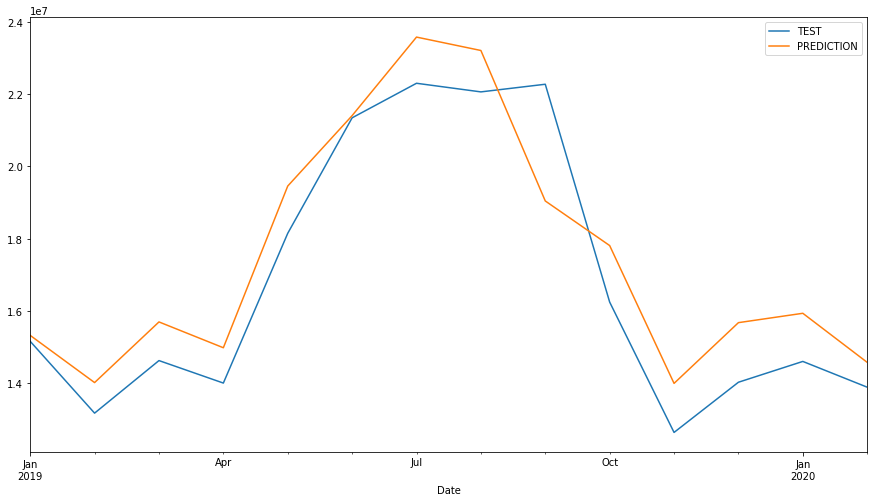

In [36]:
test_data_sum['Usage'].plot(legend=True,label='TEST')
test_predictions_sum_mul.plot(legend=True,label='PREDICTION',xlim=['2019-01-31','2020-02-29 '])

## Evaluation Metrics

In [38]:
mean_absolute_percentage_error(data_total['Usage'].loc['2019-01-31':'2020-02-29'], fitted_model_sum_mul.predict(start='2019-01-31',end='2020-02-29'))

7.208549553536438

## Forecasting using Triple HWES-Additive

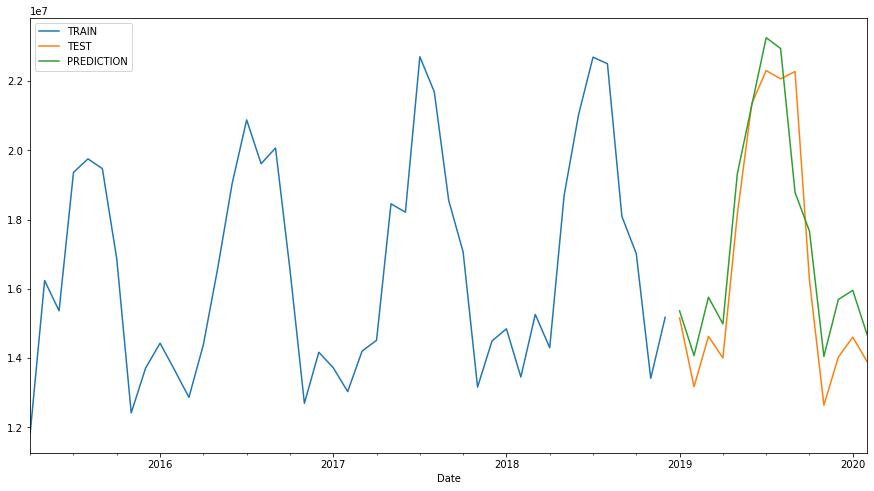

In [39]:
fitted_model_sum_add=ExponentialSmoothing(train_data_sum['Usage'],trend='add',seasonal='add',seasonal_periods=12).fit()
test_predictions_sum_add = fitted_model_sum_add.forecast(14)
train_data_sum['Usage'].plot(legend=True,label='TRAIN')
test_data_sum['Usage'].plot(legend=True,label='TEST')
test_predictions_sum_add.plot(legend=True,label='PREDICTION')

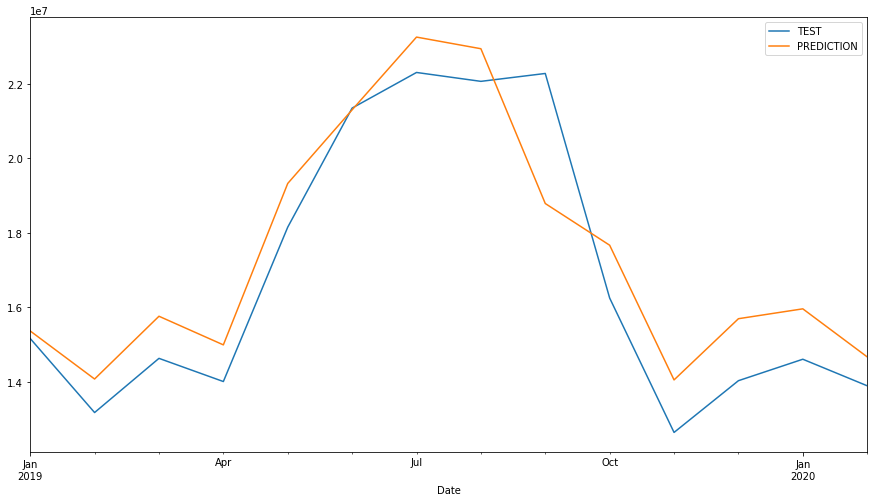

In [40]:
test_data_sum['Usage'].plot(legend=True,label='TEST')
test_predictions_sum_add.plot(legend=True,label='PREDICTION',xlim=['2019-01-31','2020-02-29 '])

## Evaluation Metrics

In [41]:
mean_absolute_percentage_error(data_total['Usage'].loc['2019-01-31':'2020-02-29'], fitted_model_sum_add.predict(start='2019-01-31',end='2020-02-29'))

7.150700069990569

# AutoArima

In [45]:
train_data_aa = data[:45]
test_data_aa = data[45:]
del train_data_aa['HWES3_ADD']
del test_data_aa['HWES3_ADD']
del train_data_aa['HWES2_MUL']
del test_data_aa['HWES2_MUL']
del train_data_aa['HWES2_ADD']
del train_data_aa['HWES3_MUL']
del test_data_aa['HWES2_ADD']
del test_data_aa['HWES3_MUL']

In [42]:
!pip install pmdarima

In [46]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")
stepwise_fit = auto_arima(train_data_aa['Usage'], start_p = 0, start_q = 0,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = 1, D = None, trace = True,
                          error_action ='ignore',   
                          suppress_warnings = True,  
                          stepwise = True) 
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=494.666, Time=0.08 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=497.869, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=486.173, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=482.209, Time=0.15 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=482.052, Time=0.02 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=481.369, Time=0.15 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=481.227, Time=0.39 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=0.89 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.36 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=494.556, Time=0.27 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=482.117, Time=0.49 sec
 ARIMA(0,1,2)(2,1,0)[12]             : AIC=481.244, Time=0.66 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=485.820, Time=0.36 sec
 ARIMA(1,1,2)(2,1,0)[12]             : AIC=inf, Time=0.87 sec
 ARIMA(0,1,1)(2,1,0)[12] intercept   : AIC=in

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   45
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -236.613
Date:                             Sun, 27 Jun 2021   AIC                            481.227
Time:                                     21:24:34   BIC                            487.090
Sample:                                          0   HQIC                           483.170
                                              - 45                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7836      0.141     -5.554      0.000      -1.060      -0.507
ar.S.L12      -0.1776      0.182     -0.976      0.329      -0.534       0.179
ar.S.L24       0.4299      0.275      1.564      0.118      -0.109       0.968
sigma2      1.168e+05   4.17e+04      2.801      0.005    3.51e+04    1.99e+05
===================================================================================
Ljung-Box (Q):                       27.11   Jarque-Bera (JB):                 0.99
Prob(Q):                              0.67   Prob(JB):                         0.61
Heteroskedasticity (H):               0.45   Skew:                            -0.39
Prob(H) (two-sided):                  0.21   Kurtosis:                         2.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Forecasting using AutoArima

In [48]:
prediction=pd.DataFrame(stepwise_fit.predict(n_periods=14),index=test_data_aa.index)
prediction.columns=['Prediction_usage']
prediction

,Prediction_usage
Date,
2019-01-31,4878.905430
2019-02-28,5012.591258
2019-03-31,5318.004253
2019-04-30,5057.487640
2019-05-31,6596.144688
2019-06-30,7063.289897
2019-07-31,7948.690322
2019-08-31,7872.890657
2019-09-30,6145.284806


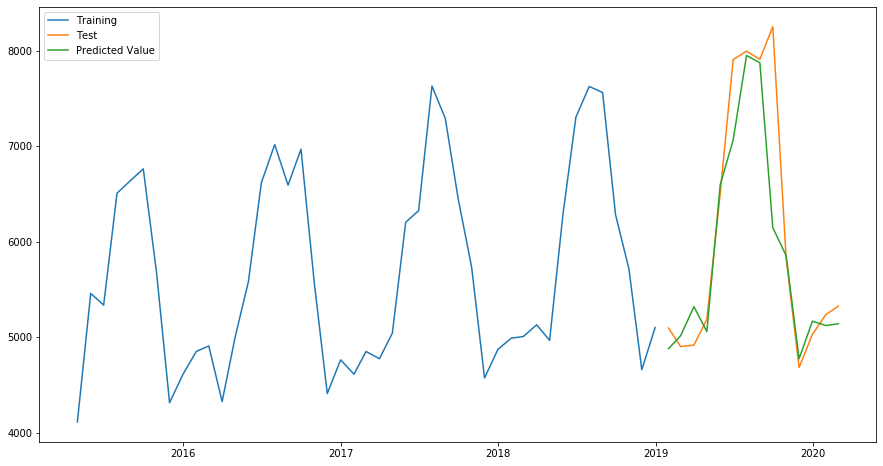

In [49]:
plt.plot(train_data_aa,label='Training')
plt.plot(test_data_aa,label='Test')
plt.plot(prediction,label='Predicted Value')
plt.legend(loc='Left Corner')
plt.show()

# Evaluation Metrics

In [58]:
mean_absolute_percentage_error(test_data_aa['Usage'],stepwise_fit.predict(n_periods=14))

4.75991257976462

# SARIMAX

## Train-Test Split


In [59]:
train_data_sa = data[:45]
test_data_sa = data[45:]
del train_data_sa['HWES3_ADD']
del test_data_sa['HWES3_ADD']
del train_data_sa['HWES2_MUL']
del test_data_sa['HWES2_MUL']
del train_data_sa['HWES2_ADD']
del train_data_sa['HWES3_MUL']
del test_data_sa['HWES2_ADD']
del test_data_sa['HWES3_MUL']

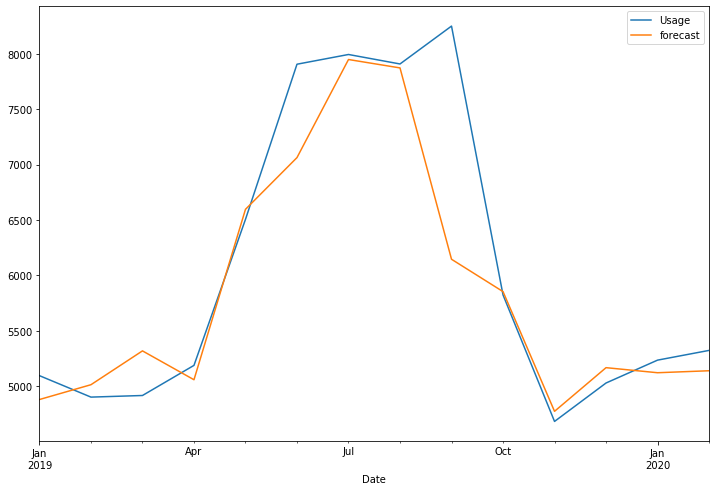

In [62]:
model=sm.tsa.statespace.SARIMAX(train_data_sa['Usage'],order=(0, 1,1),seasonal_order=(2,1,0,12))
model_fit = model.fit()
test_data['forecast']=model_fit.predict(start='2019-01-31',end='2020-02-29')
test_data[['Usage','forecast']].plot(figsize=(12,8))

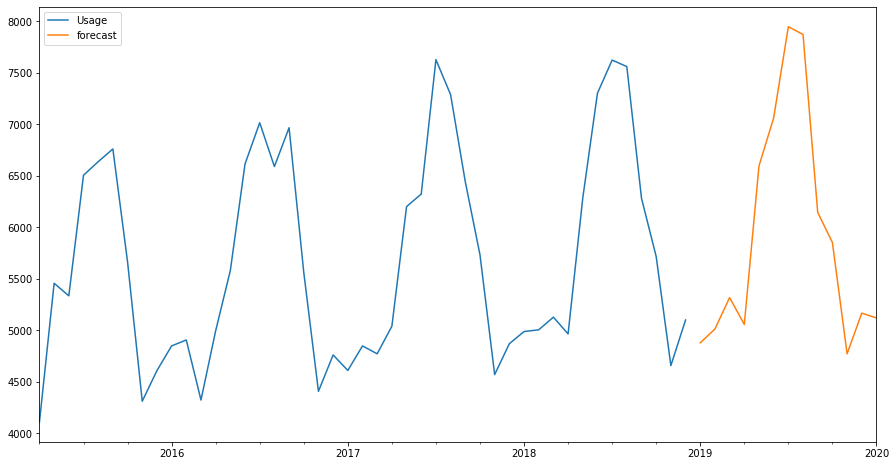

In [65]:
future_dates=[train_data_sa.index[-1]+ DateOffset(months=x)for x in range(0,14)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=train_data_sa.columns)

future_df=pd.concat([train_data_sa,future_datest_df])

future_df['forecast'] = model_fit.predict(start='2019-01-31',end='2020-02-29')
future_df[['Usage', 'forecast']].plot(figsize=(15, 8))

# Evaluation Metrics

In [66]:
mean_absolute_percentage_error(test_data_sa['Usage'].loc['2019-01-31':'2020-02-29'], model_fit.predict(start='2019-01-31',end='2020-02-29'))

4.75991257976462